In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
def report_distribution(df_occ, definitions, num_definitions, group=''):
    """
    Plots histogram or boxplots of distribution
    """
    if group == '':
        if num_definitions == 1:
            for definition in definitions: 

                avg_value = pd.DataFrame(
                    df_import[definition].agg(
                        ['mean','count']
                    )
                )
                if avg_value.loc['count'][0] > 6:
                    avg_value.loc['count'][0] = 5 * round(avg_value.loc['count'][0]/5)
                    print(f'Average {definition}:\n')
                    display(avg_value)
                    fig, ax = plt.subplots(figsize=(12, 8))
                    plt.hist(df_occ[definition].loc[~df_occ[definition].isna()], 10)
                    plt.title('Distribution of ' + definition)
                    plt.show()
                else:
                    print('Table and plot redacted due to low counts.')
                    
        else:
            df_bp = df_occ[definitions]
            avg = pd.DataFrame(df_bp.mean(),columns=['mean'])
            ct = pd.DataFrame(df_bp.count(),columns=['count'])
            avg_value = avg.merge(ct, left_index=True, right_index=True)
            # Redact and round values
            avg_value['count'] = avg_value['count'].where(
                avg_value['count'] > 5, np.nan).apply(lambda x: 5 * round(x/5) if ~np.isnan(x) else x)
            print('Averages:\n')
            display(avg_value)
            fig, ax = plt.subplots(figsize=(12, 8))
            sns.boxplot(data=df_bp,showfliers = False)
            plt.title("Distributions of values")
            plt.show()
    else:
        if num_definitions == 1:
            for definition in definitions: 
                df_bp = df_occ[[group]+ [definition]]
                avg_value = df_bp.groupby(group)[definition].agg(
                    ['mean', 'count']
                )
                # Redact and round values
                avg_value['count'] = avg_value['count'].where(
                    avg_value['count'] > 5, np.nan).apply(lambda x: 5 * round(x/5) if ~np.isnan(x) else x)
                avg_value.loc[avg_value['count'].isna(), ['count','mean']] = ['-','-']
                print(f'Averages by {group}:\n')
                display(avg_value)    
                null_index = avg_value[avg_value['count'] == '-'].index.tolist()
                fig, ax = plt.subplots(figsize=(12, 8))
                sns.boxplot(x=group, y=definition, data=df_bp.loc[~df_bp[group].isin(null_index)], showfliers=False)
                plt.title(f"Distributions by {group}")
                plt.show()
        else:
            if df_occ[group].dtype == 'bool':
                df_occ[group] = df_occ[group].apply(lambda x: str(x))
            df_occ = df_occ.loc[~df_occ[group].isna()] # Drop nan categories
            df_bp = df_occ[[group] + definitions]
            avg = df_bp.groupby(group).mean().add_prefix("avg_")
            ct = df_bp.groupby(group).count().add_prefix("ct_")
            avg_value = avg.merge(ct, left_on=group, right_on=group)
            for definition in definitions:
                # Redact and round values
                avg_value['ct_'+definition] = avg_value['ct_'+definition].where(
                    avg_value['ct_'+definition] > 5, np.nan).apply(lambda x: 5 * round(x/5) if ~np.isnan(x) else x)
                avg_value.loc[avg_value['ct_'+definition].isna(), 
                                    ['ct_'+definition,'avg_'+definition]] = ['-','-']
            print(f'Averages by {group}:\n')
            display(avg_value)
            for definition in definitions:
                null_index = []
                null_index = avg_value[avg_value['ct_'+definition] == '-'].index.tolist()
                df_bp.loc[df_bp[group].isin(null_index),definition] = np.nan
            fig, ax = plt.subplots(figsize=(12, 8))
            df_plot = df_bp.melt(id_vars=group, value_vars=definitions)
            sns.boxplot(x=group, y='value', hue='variable', data=df_plot, showfliers=False)
            plt.title(f'Distributions by {group}')
            plt.show()

In [3]:
input_path = '../output/data/input_processed.feather'
df_import = pd.read_feather(input_path)
demographic_covariates = ['age_band', 'sex', 'ethnicity', 'region', 'imd']

# Height

Average height:



,height
mean,1.65
count,9215.00


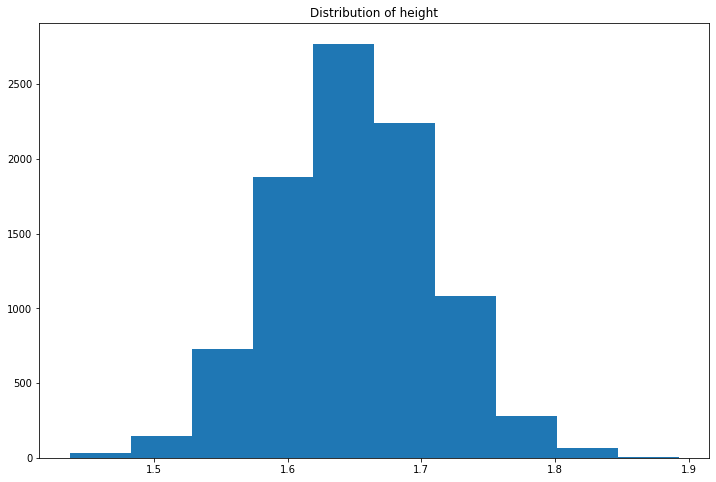

Averages by age_band:



,mean,count
age_band,,
30-39,1.65,1290
0-19,1.65,1165
40-49,1.65,1255
80+,1.65,1195
20-29,1.65,1090
50-59,1.65,1070
60-69,1.65,1205
70-79,1.65,945


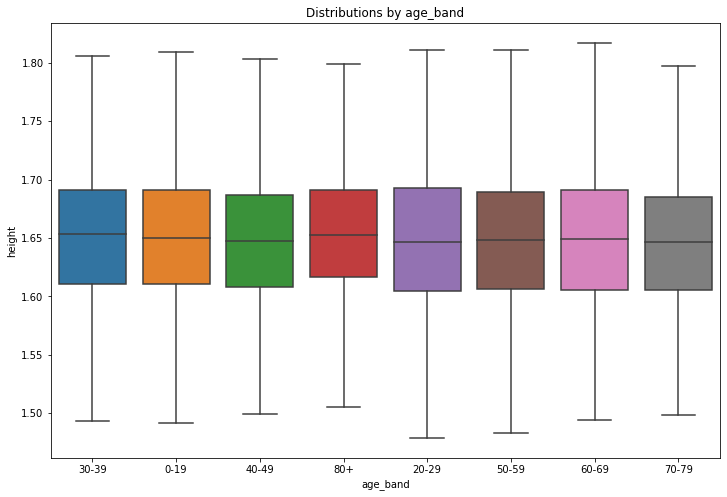

Averages by sex:



,mean,count
sex,,
F,1.65,4555
M,1.65,4665


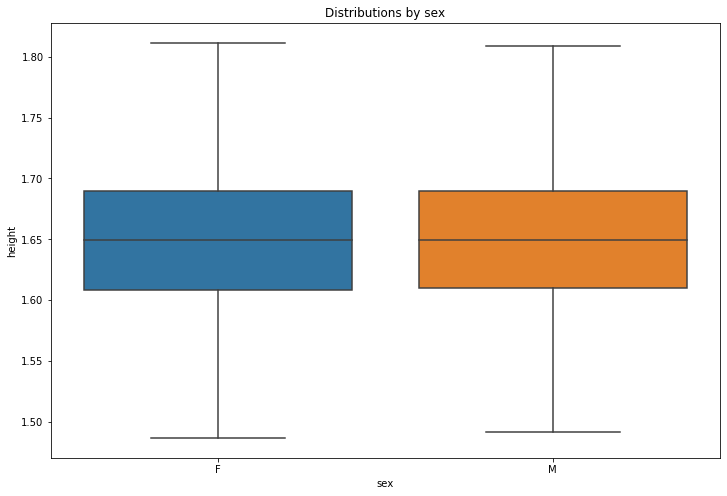

Averages by ethnicity:



,mean,count
ethnicity,,
3,1.65,1330
1,1.65,4635
2,1.65,2275
5,1.65,400
4,1.65,575


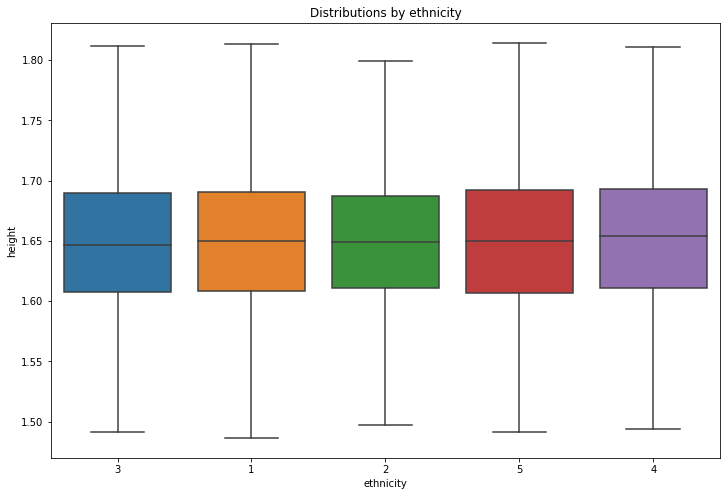

Averages by region:



,mean,count
region,,
London,1.65,1195
West Midlands,1.65,540
East of England,1.64,640
Yorkshire and the Humber,1.65,545
North East,1.65,645
South East,1.65,1240
North West,1.65,705
East Midlands,1.65,500


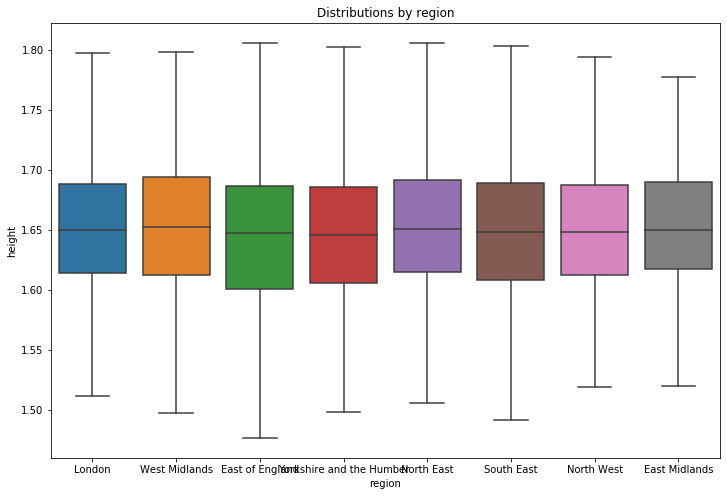

Averages by imd:



,mean,count
imd,,
3,1.65,1895
4,1.65,1715
5,1.65,1870
1,1.65,1920
2,1.65,1710
0,1.65,110


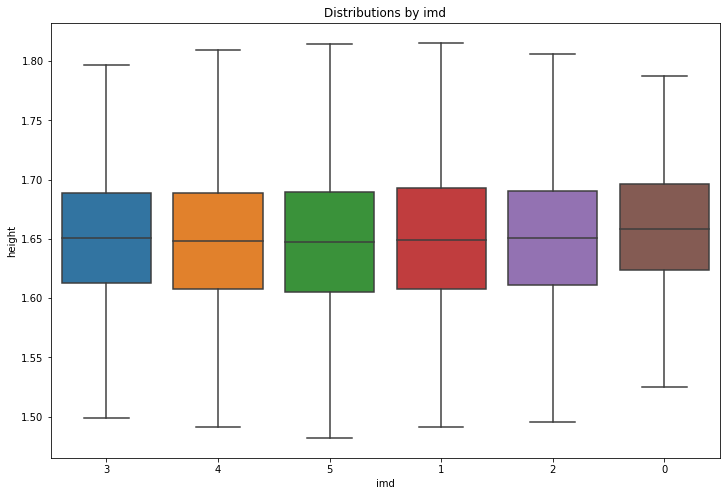

In [4]:
report_distribution(df_import, ['height'], 1, group='')
for group in demographic_covariates:
    report_distribution(df_import, ['height'], 1, group)

# Weight

Average weight:



,weight
mean,70.11
count,5475.00


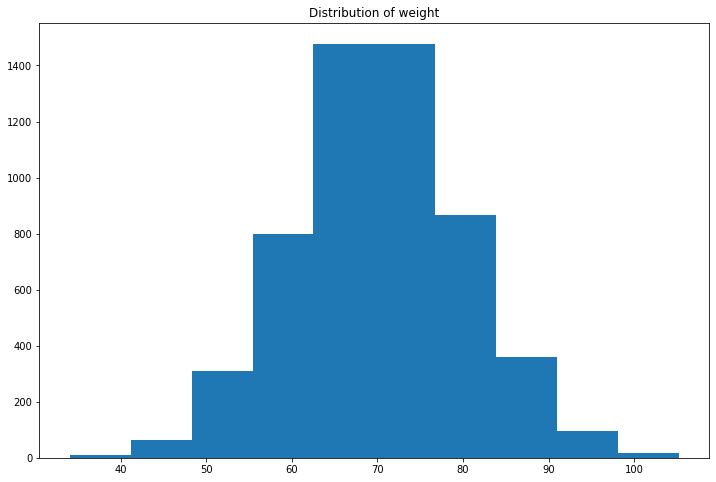

Averages by age_band:



,mean,count
age_band,,
30-39,70.16,820
0-19,69.40,705
40-49,70.43,730
80+,70.10,710
20-29,70.48,640
50-59,69.89,635
60-69,69.97,705
70-79,70.50,535


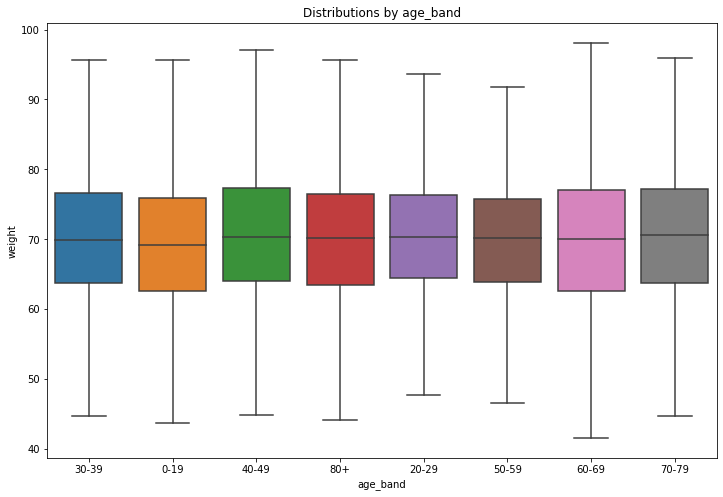

Averages by sex:



,mean,count
sex,,
F,70.17,2675
M,70.05,2800


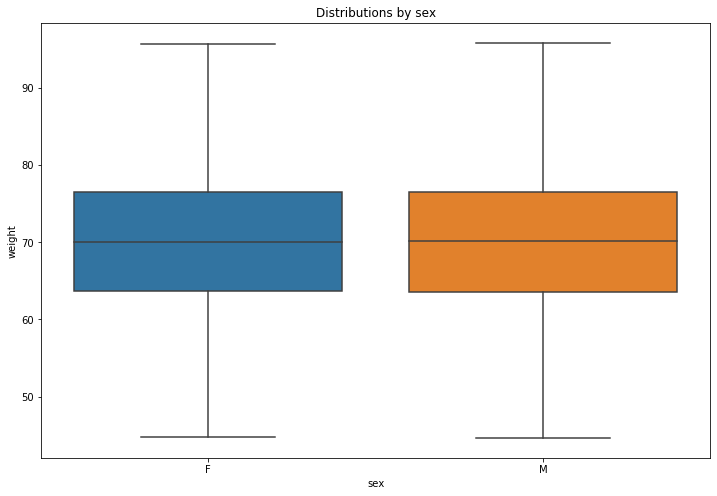

Averages by ethnicity:



,mean,count
ethnicity,,
3,70.31,765
1,70.11,2745
2,69.74,1370
5,70.91,245
4,70.49,350


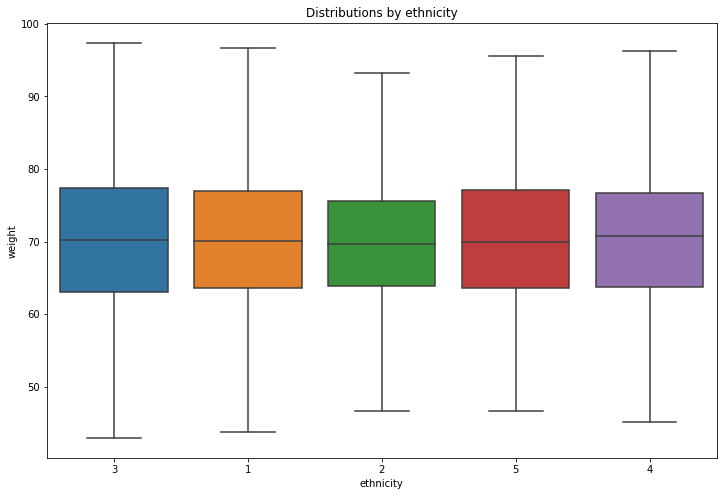

Averages by region:



,mean,count
region,,
London,69.81,710
West Midlands,69.96,315
East of England,69.74,375
Yorkshire and the Humber,69.93,325
North East,70.29,380
South East,69.76,750
North West,70.31,415
East Midlands,69.98,315


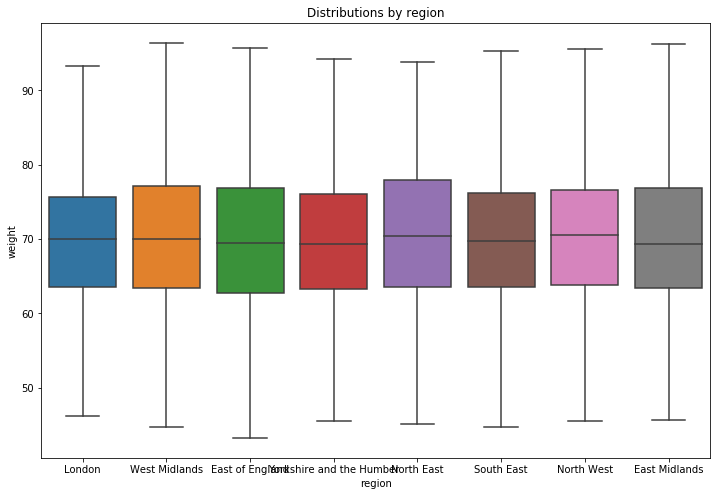

Averages by imd:



,mean,count
imd,,
3,70.37,1120
4,70.12,1030
5,69.77,1105
1,70.20,1115
2,70.08,1035
0,69.81,70


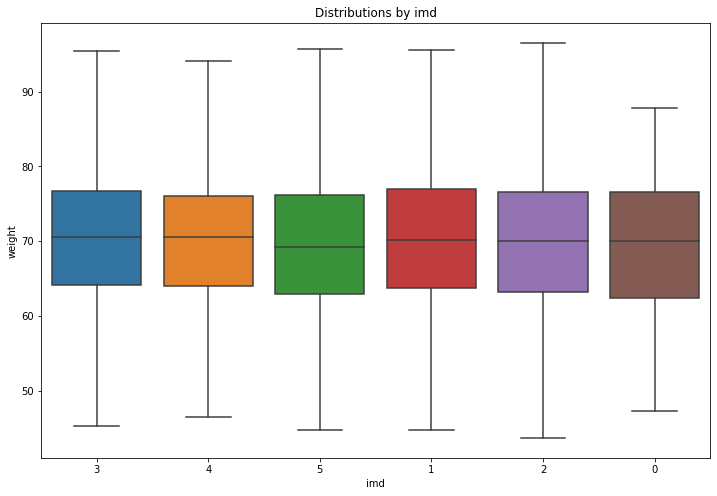

In [5]:
report_distribution(df_import, ['weight'], 1, group='')
for group in demographic_covariates:
    report_distribution(df_import, ['weight'], 1, group)